<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [85]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [86]:
df = boston_df.copy()
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [87]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


 CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable



<Axes: xlabel='MEDV'>

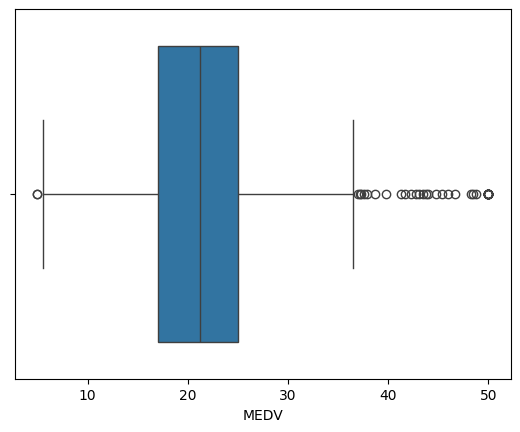

In [88]:
sns.boxplot(x = "MEDV", data = df)

<Axes: xlabel='CHAS'>

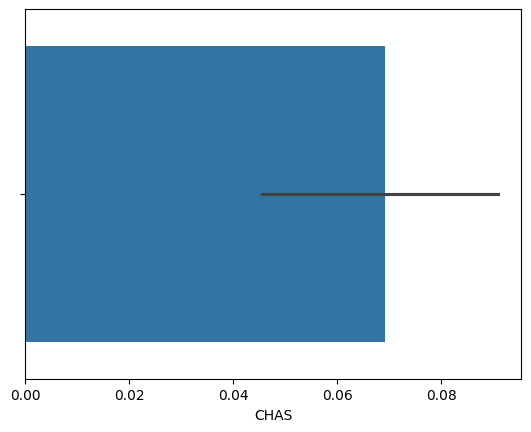

In [89]:
sns.barplot(x = "CHAS", data = df)

In [90]:
df.loc[(df["AGE"] <= 35),"age_group"] = "35 years and older"
df.loc[(df["AGE"] > 35) & (df["AGE"] < 70),"age_group"] = "between 35 and 70 years"
df.loc[(df["AGE"] >= 70),"age_group"] = "70 years and older"

<Axes: xlabel='age_group', ylabel='MEDV'>

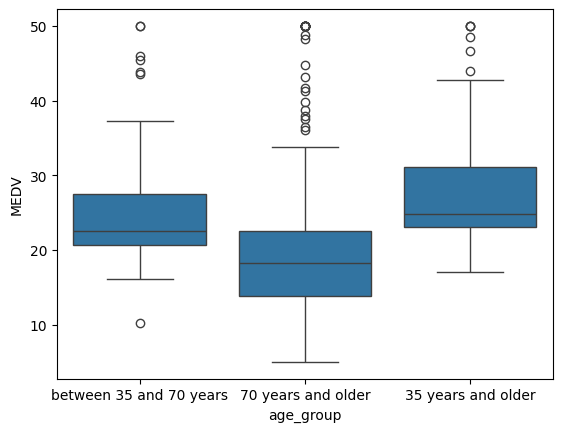

In [91]:
sns.boxplot(x = "age_group", y = "MEDV", data = df)

<Axes: xlabel='NOX', ylabel='INDUS'>

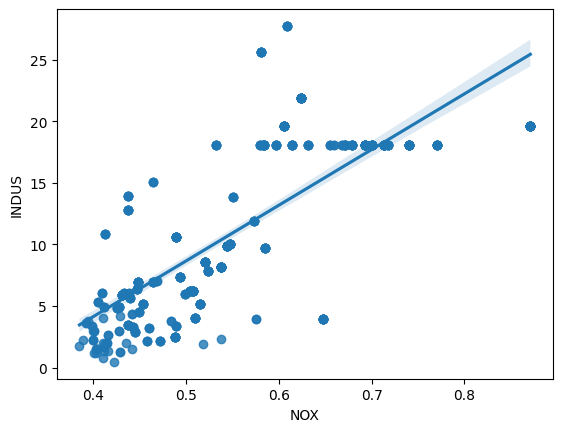

In [92]:
sns.regplot(x = "NOX", y = "INDUS", data = df)

comment : From the regression line, I can sat that there is a meaningful relationship between these variables

<Axes: xlabel='PTRATIO', ylabel='Count'>

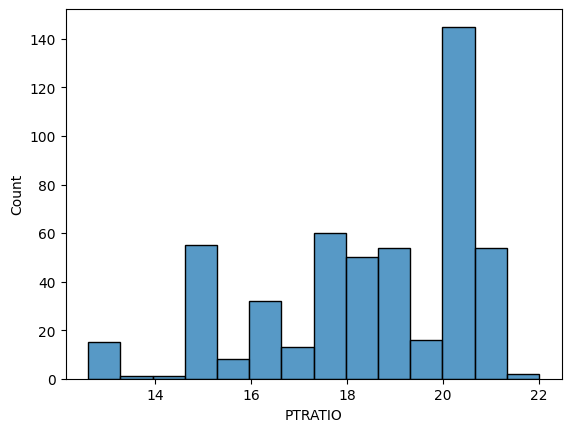

In [93]:
sns.histplot(x = "PTRATIO", data = df)

generally the ratio between student and teacher in the towns , 20 percent.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

Charles River dummy variable (1 if tract bounds river; 0 otherwise)

In [94]:
near_river = df[df['CHAS'] == 1]['MEDV']  # median values that the houses near the river
not_near_river = df[df['CHAS'] == 0]['MEDV']  #median values of the houses that not near to the river


In [95]:
from scipy.stats import shapiro

# Near Charles River
stat, p = shapiro(near_river)
print("Near River - Shapiro Test:")
print(f"Test Statistic = {stat}, p-value = {p}")

# Not Near Charles River
stat, p = shapiro(not_near_river)
print("Not Near River - Shapiro Test:")
print(f"Test Statistic = {stat}, p-value = {p}")


Near River - Shapiro Test:
Test Statistic = 0.8359232829918247, p-value = 0.00011230910190445043
Not Near River - Shapiro Test:
Test Statistic = 0.9282611613892576, p-value = 3.1144689229367766e-14


means of the near the river, are not showing a normal dist. So on we will not able to use T dist for that.

In [96]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(near_river, not_near_river, alternative='two-sided')
print("Mann-Whitney U Test:")
print(f"Test istatistiği = {stat}, p-değeri = {p}")

if p > 0.05:
    print("resut : There is a sgnificant relationship between variables.")
else:
    print("result : There is no significant relationship between variables.")


Mann-Whitney U Test:
Test istatistiği = 10879.5, p-değeri = 0.0015816705011294974
result : There is no significant relationship between variables.


In [97]:
## for t test
## first testing homogenity of the variances


In [98]:
from scipy.stats import levene, ttest_ind
levene_stat, levene_p = levene(near_river, not_near_river)
print("Levene Test:")
print(f"Test Statistic = {levene_stat}, p-value = {levene_p}")

Levene Test:
Test Statistic = 4.590342218715871, p-value = 0.03263097600633006


In [99]:
## there is no homogeneity between this two variables, even now on I can see that the result of the ttest will be less then 0.05 cuz there is no significance difference

In [100]:
# T-Testi (Independent Samples)
t_stat, ttest_p = ttest_ind(near_river, not_near_river, alternative='two-sided', equal_var=False)
print("T-Test:")
print(f"Test Statistic = {t_stat}, p-value = {ttest_p}")


T-Test:
Test Statistic = 3.113291312794837, p-value = 0.0035671700981375174


so , we will reject our null hypothesis.

In [101]:
near_river.dtype

dtype('float64')

In [102]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [103]:

group1 = df[df["AGE"] <= 35]["MEDV"],  # Group 1: AGE <= 35
group2 =  df[(df["AGE"] > 35) & (df["AGE"] < 70)]["MEDV"],  # Group 2: 35 < AGE < 70
group3 =  df[df["AGE"] > 70 ]["MEDV"]  # Group 4: AGE >= 70


In [104]:
from scipy.stats import shapiro

stat, p = shapiro(group1)
print("Shapiro Test:")
print(f"Test Statistic = {stat}, p-value = {p}")
stat, p = shapiro(group2)
print("Shapiro Test:")
print(f"Test Statistic = {stat}, p-value = {p}")
stat, p = shapiro(group3)
print(" Shapiro Test:")
print(f"Test Statistic = {stat}, p-value = {p}")

Shapiro Test:
Test Statistic = 0.8685952297492454, p-value = 1.8062164389646406e-07
Shapiro Test:
Test Statistic = 0.8358774302790954, p-value = 1.2512833519945482e-10
 Shapiro Test:
Test Statistic = 0.8497467563422931, p-value = 5.001544996962927e-16


In [105]:
from scipy.stats import f_oneway

In [106]:
age_groups = [
    df[df["AGE"] <= 35]["MEDV"],  # Group 1: AGE <= 35
    df[(df["AGE"] > 35) & (df["AGE"] < 70)]["MEDV"],  # Group 2: 35 < AGE < 70
    df[df["AGE"] >= 70]["MEDV"]   # Group 3: AGE >= 70
]

# Perform One-Way ANOVA using unpacking to pass each group separately
f_stat, p_value = f_oneway(*age_groups)  # Unpack the list with * to pass each group as a separate argument

# Output the results
print("One-Way ANOVA:")
print(f"F-Statistic = {f_stat}, p-value = {p_value}")

One-Way ANOVA:
F-Statistic = 36.40764999196599, p-value = 1.7105011022702984e-15


In [107]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Tukey HSD test
#to see which of the group making difference cuz the p_val of the sample from one way anova ,was less then 0.05
tukey = pairwise_tukeyhsd(endog=df['MEDV'], groups=df['age_group'], alpha=0.05)
print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
      group1                group2         meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------------
35 years and older      70 years and older  -7.9824    0.0 -10.4182 -5.5467   True
35 years and older between 35 and 70 years  -2.8282 0.0447  -5.6043  -0.052   True
70 years and older between 35 and 70 years   5.1543    0.0   3.0024  7.3062   True
----------------------------------------------------------------------------------


In [108]:
## So there is a difference between age groups and median of the houses.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [109]:
from scipy.stats import pearsonr
df.loc[(df["AGE"] <= 35),"age_group"] = "35 years and older"
df.loc[(df["AGE"] > 35) & (df["AGE"] < 70),"age_group"] = "between 35 and 70 years"
df.loc[(df["AGE"] >= 70),"age_group"] = "70 years and older"
df['age_group_encoded'] = df['age_group'].map({
    "35 years and older": 0,
    "between 35 and 70 years": 1,
    "70 years and older": 2
})
corr_coefficient, p_value = pearsonr(df["age_group_encoded"], df["INDUS"])
print("Pearson Correlation:")
print(f"Correlation Coefficient = {corr_coefficient}, p-value = {p_value}")

Pearson Correlation:
Correlation Coefficient = 0.5907990870696008, p-value = 6.202530418623481e-49


In [110]:
## confidently reject the null hypothesis that there is no relationship between the two variables.

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [111]:
import statsmodels.api as sm

# Define independent variable (X) and dependent variable (y)
X = df['DIS']
y = df['MEDV']

# Add a constant to the model (for the intercept term)
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Output the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        19:51:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [112]:
##The regression analysis shows that there is a statistically significant positive relationship between the weighted distance to the five employment centers (DIS) and the median value of homes (MEDV)
##The model explains only 6.2% of the variance.
##The diagnostic tests suggest that the residuals are not perfectly normal and might exhibit autocorrelation, which could affect the reliability of the model.

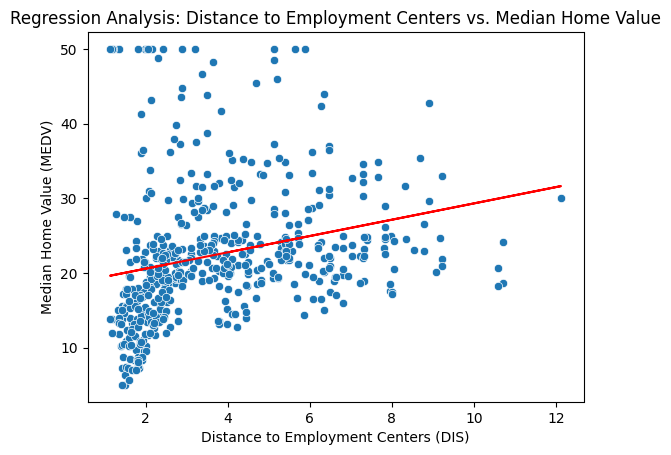

In [113]:
import matplotlib.pyplot as plt
sns.scatterplot(x='DIS', y='MEDV', data=df)
plt.plot(df['DIS'], model.predict(X), color='red')
plt.xlabel('Distance to Employment Centers (DIS)')
plt.ylabel('Median Home Value (MEDV)')
plt.title('Regression Analysis: Distance to Employment Centers vs. Median Home Value')
plt.show()